In [ ]:
import tensorflow as tf
from pathlib import Path
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.utils.np_utils import to_categorical
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from keras.layers import Input
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
from tensorflow import keras as K

In [ ]:
#os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
print(tf.config.list_physical_devices('GPU'))

[]


(493, 128, 128, 3)
493
[0 1 2 3 4] [0. 1.] [0. 1.] [0. 1.]
94765736/94765736 [==============================] - 1s 0us/step


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 dropout (Dropout)           (None, 4, 4, 2048)        0         
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dropout_1 (Dropout)         (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 5)                 163845    
                                                                 
Total params: 23751557 (90.60 MB)
Trainable params: 15139845 (57.75 MB)
Non-trainable params: 8611712 (32.85 MB)
_________________________________________________________________
Epoch 1/1

12/12 [==============================] - 70s 5s/step - loss: 30.4214 - accuracy: 0.2062 - val_loss: 66.9999 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 2/100
12/12 [==============================] - ETA: 0s - loss: 10.6369 - accuracy: 0.2881

12/12 [==============================] - 45s 4s/step - loss: 10.6369 - accuracy: 0.2881 - val_loss: 843.0847 - val_accuracy: 0.3000 - lr: 0.0010
Epoch 3/100
12/12 [==============================] - ETA: 0s - loss: 8.9176 - accuracy: 0.2401

12/12 [==============================] - 47s 4s/step - loss: 8.9176 - accuracy: 0.2401 - val_loss: 1271.2555 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 4/100
12/12 [==============================] - ETA: 0s - loss: 7.9881 - accuracy: 0.2684

12/12 [==============================] - 42s 4s/step - loss: 7.9881 - accuracy: 0.2684 - val_loss: 7462.4575 - val_accuracy: 0.3000 - lr: 0.0010
Epoch 5/100
12/12 [==============================] - ETA: 0s - loss: 5.2735 - accuracy: 0.3277

12/12 [==============================] - 44s 4s/step - loss: 5.2735 - accuracy: 0.3277 - val_loss: 7388.0601 - val_accuracy: 0.1200 - lr: 0.0010
Epoch 6/100
12/12 [==============================] - ETA: 0s - loss: 6.6057 - accuracy: 0.3136

12/12 [==============================] - 44s 4s/step - loss: 6.6057 - accuracy: 0.3136 - val_loss: 8454.9053 - val_accuracy: 0.2000 - lr: 0.0010
Epoch 7/100
12/12 [==============================] - ETA: 0s - loss: 5.4862 - accuracy: 0.3079

12/12 [==============================] - 43s 4s/step - loss: 5.4862 - accuracy: 0.3079 - val_loss: 1792.7596 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 8/100
12/12 [==============================] - ETA: 0s - loss: 4.7756 - accuracy: 0.3220

12/12 [==============================] - 47s 4s/step - loss: 4.7756 - accuracy: 0.3220 - val_loss: 1063.9093 - val_accuracy: 0.2000 - lr: 0.0010
Epoch 9/100
12/12 [==============================] - ETA: 0s - loss: 4.5475 - accuracy: 0.2994

12/12 [==============================] - 45s 4s/step - loss: 4.5475 - accuracy: 0.2994 - val_loss: 8601.9375 - val_accuracy: 0.2000 - lr: 0.0010
Epoch 10/100
12/12 [==============================] - ETA: 0s - loss: 7.2278 - accuracy: 0.2542

12/12 [==============================] - 45s 4s/step - loss: 7.2278 - accuracy: 0.2542 - val_loss: 4702.1245 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 11/100
12/12 [==============================] - ETA: 0s - loss: 3.4681 - accuracy: 0.3164

12/12 [==============================] - 45s 4s/step - loss: 3.4681 - accuracy: 0.3164 - val_loss: 1362.0737 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 12/100
12/12 [==============================] - ETA: 0s - loss: 5.4851 - accuracy: 0.3192

12/12 [==============================] - 43s 4s/step - loss: 5.4851 - accuracy: 0.3192 - val_loss: 4949.1401 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 13/100
12/12 [==============================] - ETA: 0s - loss: 5.0759 - accuracy: 0.2655

12/12 [==============================] - 47s 4s/step - loss: 5.0759 - accuracy: 0.2655 - val_loss: 2327.2520 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 14/100
12/12 [==============================] - ETA: 0s - loss: 4.4007 - accuracy: 0.2938

12/12 [==============================] - 49s 4s/step - loss: 4.4007 - accuracy: 0.2938 - val_loss: 1609.8923 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 15/100
12/12 [==============================] - ETA: 0s - loss: 4.1248 - accuracy: 0.3475

12/12 [==============================] - 45s 4s/step - loss: 4.1248 - accuracy: 0.3475 - val_loss: 202.7523 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 16/100
12/12 [==============================] - ETA: 0s - loss: 4.1567 - accuracy: 0.3220

12/12 [==============================] - 46s 4s/step - loss: 4.1567 - accuracy: 0.3220 - val_loss: 367.6460 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 17/100
12/12 [==============================] - ETA: 0s - loss: 4.8298 - accuracy: 0.3249

12/12 [==============================] - 47s 4s/step - loss: 4.8298 - accuracy: 0.3249 - val_loss: 199.2325 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 18/100
12/12 [==============================] - ETA: 0s - loss: 3.6051 - accuracy: 0.3051

12/12 [==============================] - 47s 4s/step - loss: 3.6051 - accuracy: 0.3051 - val_loss: 529.8326 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 19/100
12/12 [==============================] - ETA: 0s - loss: 3.9258 - accuracy: 0.2768

12/12 [==============================] - 45s 4s/step - loss: 3.9258 - accuracy: 0.2768 - val_loss: 59.4643 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 20/100
12/12 [==============================] - ETA: 0s - loss: 4.0602 - accuracy: 0.3192

12/12 [==============================] - 45s 4s/step - loss: 4.0602 - accuracy: 0.3192 - val_loss: 108.6752 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 21/100
12/12 [==============================] - ETA: 0s - loss: 4.0604 - accuracy: 0.3277

12/12 [==============================] - 45s 4s/step - loss: 4.0604 - accuracy: 0.3277 - val_loss: 84.0518 - val_accuracy: 0.2000 - lr: 0.0010
Epoch 22/100
12/12 [==============================] - ETA: 0s - loss: 4.5486 - accuracy: 0.3079

12/12 [==============================] - 46s 4s/step - loss: 4.5486 - accuracy: 0.3079 - val_loss: 86.5111 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 23/100
12/12 [==============================] - ETA: 0s - loss: 4.4696 - accuracy: 0.2966

12/12 [==============================] - 47s 4s/step - loss: 4.4696 - accuracy: 0.2966 - val_loss: 25.5094 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 24/100
12/12 [==============================] - ETA: 0s - loss: 4.0184 - accuracy: 0.3390

12/12 [==============================] - 47s 4s/step - loss: 4.0184 - accuracy: 0.3390 - val_loss: 243.7271 - val_accuracy: 0.3000 - lr: 0.0010
Epoch 25/100
12/12 [==============================] - ETA: 0s - loss: 4.4373 - accuracy: 0.2994

12/12 [==============================] - 45s 4s/step - loss: 4.4373 - accuracy: 0.2994 - val_loss: 87.0042 - val_accuracy: 0.1800 - lr: 0.0010
Epoch 26/100
12/12 [==============================] - ETA: 0s - loss: 3.9272 - accuracy: 0.2768

12/12 [==============================] - 42s 4s/step - loss: 3.9272 - accuracy: 0.2768 - val_loss: 370.1441 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 27/100
12/12 [==============================] - ETA: 0s - loss: 3.3715 - accuracy: 0.3107

12/12 [==============================] - 47s 4s/step - loss: 3.3715 - accuracy: 0.3107 - val_loss: 1026.5153 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 28/100
12/12 [==============================] - ETA: 0s - loss: 4.1098 - accuracy: 0.3023

12/12 [==============================] - 47s 4s/step - loss: 4.1098 - accuracy: 0.3023 - val_loss: 1038.2191 - val_accuracy: 0.1800 - lr: 0.0010
Epoch 29/100
12/12 [==============================] - ETA: 0s - loss: 3.5765 - accuracy: 0.3220

12/12 [==============================] - 45s 4s/step - loss: 3.5765 - accuracy: 0.3220 - val_loss: 898.4150 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 30/100
12/12 [==============================] - ETA: 0s - loss: 4.0964 - accuracy: 0.2740

12/12 [==============================] - 45s 4s/step - loss: 4.0964 - accuracy: 0.2740 - val_loss: 409.5792 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 31/100
12/12 [==============================] - ETA: 0s - loss: 3.0474 - accuracy: 0.3023

12/12 [==============================] - 46s 4s/step - loss: 3.0474 - accuracy: 0.3023 - val_loss: 671.9977 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 32/100
12/12 [==============================] - ETA: 0s - loss: 3.9877 - accuracy: 0.3249

12/12 [==============================] - 47s 4s/step - loss: 3.9877 - accuracy: 0.3249 - val_loss: 1724.2329 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 33/100
12/12 [==============================] - ETA: 0s - loss: 3.5474 - accuracy: 0.2797

12/12 [==============================] - 47s 4s/step - loss: 3.5474 - accuracy: 0.2797 - val_loss: 624.5568 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 34/100
12/12 [==============================] - ETA: 0s - loss: 3.2736 - accuracy: 0.3362

12/12 [==============================] - 46s 4s/step - loss: 3.2736 - accuracy: 0.3362 - val_loss: 360.1045 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 35/100
12/12 [==============================] - ETA: 0s - loss: 3.1229 - accuracy: 0.3192

12/12 [==============================] - 46s 4s/step - loss: 3.1229 - accuracy: 0.3192 - val_loss: 723.4187 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 36/100
12/12 [==============================] - ETA: 0s - loss: 2.8414 - accuracy: 0.3107

12/12 [==============================] - 45s 4s/step - loss: 2.8414 - accuracy: 0.3107 - val_loss: 382.6042 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 37/100
12/12 [==============================] - ETA: 0s - loss: 2.8855 - accuracy: 0.3107

12/12 [==============================] - 47s 4s/step - loss: 2.8855 - accuracy: 0.3107 - val_loss: 213.7746 - val_accuracy: 0.3600 - lr: 0.0010
Epoch 38/100
12/12 [==============================] - ETA: 0s - loss: 3.0526 - accuracy: 0.2938

12/12 [==============================] - 45s 4s/step - loss: 3.0526 - accuracy: 0.2938 - val_loss: 103.4566 - val_accuracy: 0.2000 - lr: 0.0010
Epoch 39/100
12/12 [==============================] - ETA: 0s - loss: 3.7780 - accuracy: 0.3136

12/12 [==============================] - 46s 4s/step - loss: 3.7780 - accuracy: 0.3136 - val_loss: 126.9432 - val_accuracy: 0.2000 - lr: 0.0010
Epoch 40/100
12/12 [==============================] - ETA: 0s - loss: 2.8224 - accuracy: 0.3305

12/12 [==============================] - 45s 4s/step - loss: 2.8224 - accuracy: 0.3305 - val_loss: 270.6758 - val_accuracy: 0.3600 - lr: 0.0010
Epoch 41/100
12/12 [==============================] - ETA: 0s - loss: 4.2868 - accuracy: 0.3079

12/12 [==============================] - 45s 4s/step - loss: 4.2868 - accuracy: 0.3079 - val_loss: 4.9115 - val_accuracy: 0.3200 - lr: 0.0010
Epoch 42/100
12/12 [==============================] - ETA: 0s - loss: 3.8572 - accuracy: 0.3079

12/12 [==============================] - 46s 4s/step - loss: 3.8572 - accuracy: 0.3079 - val_loss: 20.7285 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 43/100
12/12 [==============================] - ETA: 0s - loss: 3.7799 - accuracy: 0.3503

12/12 [==============================] - 45s 4s/step - loss: 3.7799 - accuracy: 0.3503 - val_loss: 20.7023 - val_accuracy: 0.3800 - lr: 0.0010
Epoch 44/100
12/12 [==============================] - ETA: 0s - loss: 3.5036 - accuracy: 0.3107

12/12 [==============================] - 45s 4s/step - loss: 3.5036 - accuracy: 0.3107 - val_loss: 9.2536 - val_accuracy: 0.2200 - lr: 0.0010
Epoch 45/100
12/12 [==============================] - ETA: 0s - loss: 3.0811 - accuracy: 0.2853

12/12 [==============================] - 45s 4s/step - loss: 3.0811 - accuracy: 0.2853 - val_loss: 4.6026 - val_accuracy: 0.3000 - lr: 0.0010
Epoch 46/100
12/12 [==============================] - ETA: 0s - loss: 3.1060 - accuracy: 0.3672

12/12 [==============================] - 45s 4s/step - loss: 3.1060 - accuracy: 0.3672 - val_loss: 42.8196 - val_accuracy: 0.3000 - lr: 0.0010
Epoch 47/100
12/12 [==============================] - ETA: 0s - loss: 3.4203 - accuracy: 0.3277

12/12 [==============================] - 45s 4s/step - loss: 3.4203 - accuracy: 0.3277 - val_loss: 136.6216 - val_accuracy: 0.3200 - lr: 0.0010
Epoch 48/100
12/12 [==============================] - ETA: 0s - loss: 3.3055 - accuracy: 0.3051

12/12 [==============================] - 45s 4s/step - loss: 3.3055 - accuracy: 0.3051 - val_loss: 110.8013 - val_accuracy: 0.3200 - lr: 0.0010
Epoch 49/100
12/12 [==============================] - ETA: 0s - loss: 2.8407 - accuracy: 0.3023

12/12 [==============================] - 44s 4s/step - loss: 2.8407 - accuracy: 0.3023 - val_loss: 38.4207 - val_accuracy: 0.3000 - lr: 0.0010
Epoch 50/100
12/12 [==============================] - ETA: 0s - loss: 3.0183 - accuracy: 0.2740

12/12 [==============================] - 44s 4s/step - loss: 3.0183 - accuracy: 0.2740 - val_loss: 25.9795 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 51/100
12/12 [==============================] - ETA: 0s - loss: 3.3326 - accuracy: 0.3503

12/12 [==============================] - 43s 4s/step - loss: 3.3326 - accuracy: 0.3503 - val_loss: 14.6792 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 52/100
12/12 [==============================] - ETA: 0s - loss: 3.0007 - accuracy: 0.3446

12/12 [==============================] - 44s 4s/step - loss: 3.0007 - accuracy: 0.3446 - val_loss: 6.2641 - val_accuracy: 0.3600 - lr: 0.0010
Epoch 53/100
12/12 [==============================] - ETA: 0s - loss: 3.3231 - accuracy: 0.2938

12/12 [==============================] - 44s 4s/step - loss: 3.3231 - accuracy: 0.2938 - val_loss: 4.5874 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 54/100
12/12 [==============================] - ETA: 0s - loss: 3.4921 - accuracy: 0.3475

12/12 [==============================] - 44s 4s/step - loss: 3.4921 - accuracy: 0.3475 - val_loss: 35.9059 - val_accuracy: 0.2600 - lr: 0.0010
Epoch 55/100
12/12 [==============================] - ETA: 0s - loss: 2.4659 - accuracy: 0.3616

12/12 [==============================] - 44s 4s/step - loss: 2.4659 - accuracy: 0.3616 - val_loss: 81.0096 - val_accuracy: 0.3200 - lr: 0.0010
Epoch 56/100
12/12 [==============================] - ETA: 0s - loss: 3.2532 - accuracy: 0.3390

12/12 [==============================] - 49s 4s/step - loss: 3.2532 - accuracy: 0.3390 - val_loss: 3.4485 - val_accuracy: 0.3600 - lr: 0.0010
Epoch 57/100
12/12 [==============================] - ETA: 0s - loss: 3.9246 - accuracy: 0.3136

12/12 [==============================] - 44s 4s/step - loss: 3.9246 - accuracy: 0.3136 - val_loss: 84.3291 - val_accuracy: 0.3000 - lr: 0.0010
Epoch 58/100
12/12 [==============================] - ETA: 0s - loss: 2.3823 - accuracy: 0.3757

12/12 [==============================] - 44s 4s/step - loss: 2.3823 - accuracy: 0.3757 - val_loss: 20.0148 - val_accuracy: 0.3600 - lr: 0.0010
Epoch 59/100
12/12 [==============================] - ETA: 0s - loss: 2.8034 - accuracy: 0.3559

12/12 [==============================] - 42s 3s/step - loss: 2.8034 - accuracy: 0.3559 - val_loss: 62.7287 - val_accuracy: 0.2800 - lr: 0.0010
Epoch 60/100
12/12 [==============================] - ETA: 0s - loss: 3.2291 - accuracy: 0.3107

12/12 [==============================] - 43s 3s/step - loss: 3.2291 - accuracy: 0.3107 - val_loss: 61.0378 - val_accuracy: 0.2200 - lr: 0.0010
Epoch 61/100
12/12 [==============================] - ETA: 0s - loss: 3.3173 - accuracy: 0.3107

12/12 [==============================] - 43s 4s/step - loss: 3.3173 - accuracy: 0.3107 - val_loss: 502.0108 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 62/100
12/12 [==============================] - ETA: 0s - loss: 2.8738 - accuracy: 0.3390

12/12 [==============================] - 46s 4s/step - loss: 2.8738 - accuracy: 0.3390 - val_loss: 264.7463 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 63/100
12/12 [==============================] - ETA: 0s - loss: 2.4749 - accuracy: 0.3333

12/12 [==============================] - 43s 4s/step - loss: 2.4749 - accuracy: 0.3333 - val_loss: 795.2617 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 64/100
12/12 [==============================] - ETA: 0s - loss: 2.5997 - accuracy: 0.3390

12/12 [==============================] - 45s 4s/step - loss: 2.5997 - accuracy: 0.3390 - val_loss: 356.5532 - val_accuracy: 0.2000 - lr: 0.0010
Epoch 65/100
12/12 [==============================] - ETA: 0s - loss: 2.8646 - accuracy: 0.3136

12/12 [==============================] - 43s 4s/step - loss: 2.8646 - accuracy: 0.3136 - val_loss: 351.3000 - val_accuracy: 0.3600 - lr: 0.0010
Epoch 66/100
12/12 [==============================] - ETA: 0s - loss: 1.9461 - accuracy: 0.3475

12/12 [==============================] - 43s 4s/step - loss: 1.9461 - accuracy: 0.3475 - val_loss: 80.4790 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 67/100
12/12 [==============================] - ETA: 0s - loss: 3.3308 - accuracy: 0.3446

12/12 [==============================] - 44s 4s/step - loss: 3.3308 - accuracy: 0.3446 - val_loss: 229.5483 - val_accuracy: 0.3600 - lr: 0.0010
Epoch 68/100
12/12 [==============================] - ETA: 0s - loss: 2.4343 - accuracy: 0.3249

12/12 [==============================] - 44s 4s/step - loss: 2.4343 - accuracy: 0.3249 - val_loss: 182.7012 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 69/100
12/12 [==============================] - ETA: 0s - loss: 2.9349 - accuracy: 0.3249

12/12 [==============================] - 44s 4s/step - loss: 2.9349 - accuracy: 0.3249 - val_loss: 235.7124 - val_accuracy: 0.2600 - lr: 0.0010
Epoch 70/100
12/12 [==============================] - ETA: 0s - loss: 2.9134 - accuracy: 0.3644

12/12 [==============================] - 44s 4s/step - loss: 2.9134 - accuracy: 0.3644 - val_loss: 215.4985 - val_accuracy: 0.2600 - lr: 0.0010
Epoch 71/100
12/12 [==============================] - ETA: 0s - loss: 4.1354 - accuracy: 0.3107

12/12 [==============================] - 44s 4s/step - loss: 4.1354 - accuracy: 0.3107 - val_loss: 402.5819 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 72/100
12/12 [==============================] - ETA: 0s - loss: 2.2657 - accuracy: 0.3701

12/12 [==============================] - 44s 4s/step - loss: 2.2657 - accuracy: 0.3701 - val_loss: 215.7011 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 73/100
12/12 [==============================] - ETA: 0s - loss: 2.8536 - accuracy: 0.2938

12/12 [==============================] - 43s 4s/step - loss: 2.8536 - accuracy: 0.2938 - val_loss: 20.5356 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 74/100
12/12 [==============================] - ETA: 0s - loss: 1.7656 - accuracy: 0.3333

12/12 [==============================] - 43s 4s/step - loss: 1.7656 - accuracy: 0.3333 - val_loss: 4.5088 - val_accuracy: 0.3200 - lr: 0.0010
Epoch 75/100
12/12 [==============================] - ETA: 0s - loss: 2.3389 - accuracy: 0.3277

12/12 [==============================] - 43s 4s/step - loss: 2.3389 - accuracy: 0.3277 - val_loss: 49.1363 - val_accuracy: 0.2200 - lr: 0.0010
Epoch 76/100
12/12 [==============================] - ETA: 0s - loss: 2.8167 - accuracy: 0.3531

12/12 [==============================] - 44s 4s/step - loss: 2.8167 - accuracy: 0.3531 - val_loss: 2.0377 - val_accuracy: 0.2800 - lr: 0.0010
Epoch 77/100
12/12 [==============================] - ETA: 0s - loss: 3.0938 - accuracy: 0.3814

12/12 [==============================] - 44s 4s/step - loss: 3.0938 - accuracy: 0.3814 - val_loss: 66.6769 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 78/100
12/12 [==============================] - ETA: 0s - loss: 4.0223 - accuracy: 0.3333

12/12 [==============================] - 42s 4s/step - loss: 4.0223 - accuracy: 0.3333 - val_loss: 43.3809 - val_accuracy: 0.2200 - lr: 0.0010
Epoch 79/100
12/12 [==============================] - ETA: 0s - loss: 4.0044 - accuracy: 0.3277

12/12 [==============================] - 43s 3s/step - loss: 4.0044 - accuracy: 0.3277 - val_loss: 14.3316 - val_accuracy: 0.3200 - lr: 0.0010
Epoch 80/100
12/12 [==============================] - ETA: 0s - loss: 2.9459 - accuracy: 0.3559

12/12 [==============================] - 46s 4s/step - loss: 2.9459 - accuracy: 0.3559 - val_loss: 19.2620 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 81/100
12/12 [==============================] - ETA: 0s - loss: 2.6013 - accuracy: 0.2994

12/12 [==============================] - 47s 4s/step - loss: 2.6013 - accuracy: 0.2994 - val_loss: 20.9795 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 82/100
12/12 [==============================] - ETA: 0s - loss: 2.4908 - accuracy: 0.3446

12/12 [==============================] - 43s 4s/step - loss: 2.4908 - accuracy: 0.3446 - val_loss: 62.0638 - val_accuracy: 0.3600 - lr: 0.0010
Epoch 83/100
12/12 [==============================] - ETA: 0s - loss: 2.0595 - accuracy: 0.3475

12/12 [==============================] - 46s 4s/step - loss: 2.0595 - accuracy: 0.3475 - val_loss: 428.7689 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 84/100
12/12 [==============================] - ETA: 0s - loss: 2.3564 - accuracy: 0.3362

12/12 [==============================] - 43s 4s/step - loss: 2.3564 - accuracy: 0.3362 - val_loss: 363.5396 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 85/100
12/12 [==============================] - ETA: 0s - loss: 3.0487 - accuracy: 0.3390

12/12 [==============================] - 45s 4s/step - loss: 3.0487 - accuracy: 0.3390 - val_loss: 181.3845 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 86/100
12/12 [==============================] - ETA: 0s - loss: 2.3823 - accuracy: 0.4068

12/12 [==============================] - 46s 4s/step - loss: 2.3823 - accuracy: 0.4068 - val_loss: 147.6521 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 87/100
12/12 [==============================] - ETA: 0s - loss: 2.2973 - accuracy: 0.3475

12/12 [==============================] - 45s 4s/step - loss: 2.2973 - accuracy: 0.3475 - val_loss: 402.0864 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 88/100
12/12 [==============================] - ETA: 0s - loss: 2.6906 - accuracy: 0.3220

12/12 [==============================] - 45s 4s/step - loss: 2.6906 - accuracy: 0.3220 - val_loss: 472.2115 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 89/100
12/12 [==============================] - ETA: 0s - loss: 2.1001 - accuracy: 0.3729

12/12 [==============================] - 45s 4s/step - loss: 2.1001 - accuracy: 0.3729 - val_loss: 151.0708 - val_accuracy: 0.3200 - lr: 0.0010
Epoch 90/100
12/12 [==============================] - ETA: 0s - loss: 2.0724 - accuracy: 0.3842

12/12 [==============================] - 43s 4s/step - loss: 2.0724 - accuracy: 0.3842 - val_loss: 40.2964 - val_accuracy: 0.3200 - lr: 0.0010
Epoch 91/100
12/12 [==============================] - ETA: 0s - loss: 2.3306 - accuracy: 0.3672

12/12 [==============================] - 44s 4s/step - loss: 2.3306 - accuracy: 0.3672 - val_loss: 17.5728 - val_accuracy: 0.2800 - lr: 0.0010
Epoch 92/100
12/12 [==============================] - ETA: 0s - loss: 2.8844 - accuracy: 0.3757

12/12 [==============================] - 44s 4s/step - loss: 2.8844 - accuracy: 0.3757 - val_loss: 10.7207 - val_accuracy: 0.2800 - lr: 0.0010
Epoch 93/100
12/12 [==============================] - ETA: 0s - loss: 2.5293 - accuracy: 0.3588

12/12 [==============================] - 44s 4s/step - loss: 2.5293 - accuracy: 0.3588 - val_loss: 40.7220 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 94/100
12/12 [==============================] - ETA: 0s - loss: 2.8459 - accuracy: 0.3588

12/12 [==============================] - 44s 4s/step - loss: 2.8459 - accuracy: 0.3588 - val_loss: 39.3347 - val_accuracy: 0.3800 - lr: 0.0010
Epoch 95/100
12/12 [==============================] - ETA: 0s - loss: 3.0009 - accuracy: 0.3559

12/12 [==============================] - 44s 4s/step - loss: 3.0009 - accuracy: 0.3559 - val_loss: 15.0518 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 96/100
12/12 [==============================] - ETA: 0s - loss: 2.3153 - accuracy: 0.3898

12/12 [==============================] - 43s 4s/step - loss: 2.3153 - accuracy: 0.3898 - val_loss: 70.2895 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 97/100
12/12 [==============================] - ETA: 0s - loss: 3.0525 - accuracy: 0.3701

12/12 [==============================] - 44s 4s/step - loss: 3.0525 - accuracy: 0.3701 - val_loss: 49.5701 - val_accuracy: 0.4200 - lr: 0.0010
Epoch 98/100
12/12 [==============================] - ETA: 0s - loss: 3.0437 - accuracy: 0.3362

12/12 [==============================] - 42s 4s/step - loss: 3.0437 - accuracy: 0.3362 - val_loss: 63.4057 - val_accuracy: 0.3200 - lr: 0.0010
Epoch 99/100
12/12 [==============================] - ETA: 0s - loss: 1.8102 - accuracy: 0.3842

12/12 [==============================] - 45s 4s/step - loss: 1.8102 - accuracy: 0.3842 - val_loss: 13.3376 - val_accuracy: 0.3200 - lr: 0.0010
Epoch 100/100
12/12 [==============================] - ETA: 0s - loss: 2.2853 - accuracy: 0.3672

12/12 [==============================] - 45s 4s/step - loss: 2.2853 - accuracy: 0.3672 - val_loss: 352.9584 - val_accuracy: 0.3400 - lr: 0.0010
3/3 - 4s - loss: 217.1839 - accuracy: 0.4045 - 4s/epoch - 1s/step

Val accuracy: 0.40449437499046326
Val loss: 217.18385314941406
12/12 - 21s - loss: 215.3431 - accuracy: 0.3955 - 21s/epoch - 2s/step

Train accuracy: 0.395480215549469
Train loss: 215.3430938720703
3/3 [==============================] - 7s 1s/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00         4
           4       0.40      1.00      0.58        36

    accuracy                           0.40        89
   macro avg       0.08      0.20      0.12        89
weighted avg       0.16      0.40      0.23        89

[[ 0  0  0  0  9]
 [ 0  0  0  0 20]
 [ 0  0  0  0 20]
 [ 0  0  0  0  4]
 [ 0  0  0  0 36]]


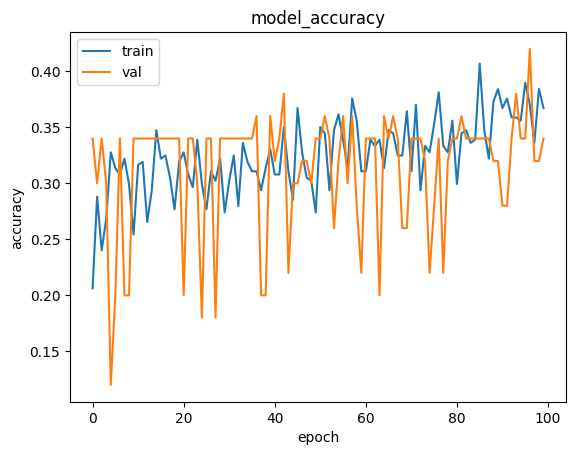

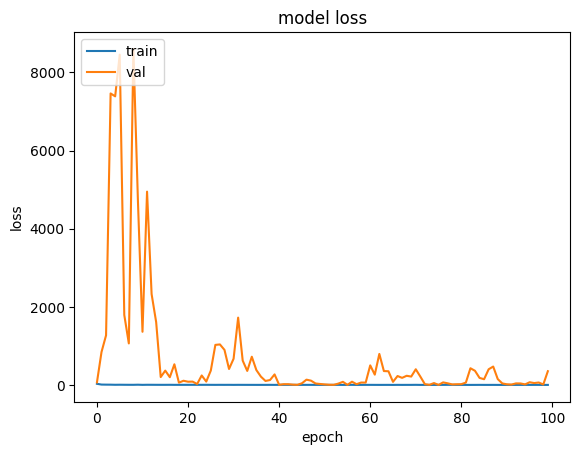

AUC: 0.6373926447800887


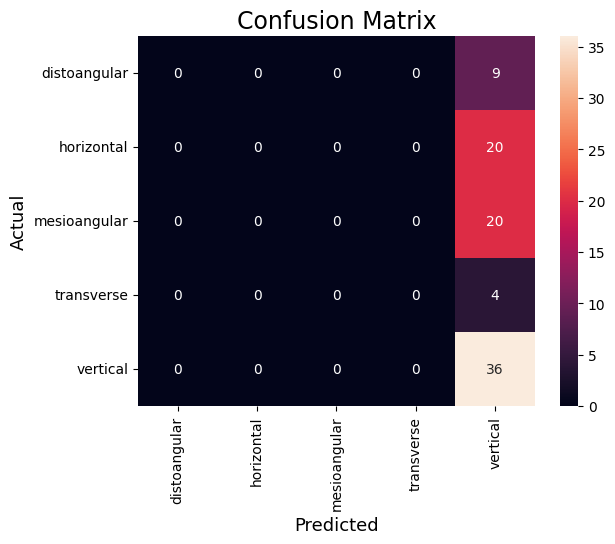

In [ ]:
def load_dataset(dataset_path):
    data = []
    labels = []
    class_names=['distoangular','horizontal','mesioangular','transverse','vertical']

    for class_name in class_names:
        # class_path = dataset_path / class_name
        class_path = os.path.join(dataset_dir, class_name)
        label_encoder = LabelEncoder()
        class_path = Path(class_path)
        image_paths = (list(class_path.glob("*.[jJ][pP][gG]")) + list(class_path.glob("*.[pP][nN][gG]"))) + list(class_path.glob("*.bmp"))

        for image_path in image_paths:
            image = tf.io.read_file(str(image_path))
            image_extension = image_path.suffix.lower()
            if image_extension == '.jpeg' or image_extension == '.jpg':
                image = tf.image.decode_jpeg(image, channels=3)
            elif image_extension == '.png':
                image = tf.image.decode_png(image, channels=3)
            elif image_extension == '.bmp':
                image = tf.image.decode_bmp(image)
            else:
                raise ValueError(f"Unsupported image format: {image_extension}")

            # image = tf.image.decode_jpeg(image, channels=3)
            image = tf.image.resize(image, (128,128))
            data.append(image)
            labels.append(class_name)

    data = tf.stack(data)
    # Use the label encoder to transform class names to integers
    labels = label_encoder.fit_transform(labels)

    return data, labels

dataset_dir=r"/content/drive/MyDrive/FYP 1/thirdmolar_dataset/left"

data, labels = load_dataset(dataset_dir)
custom_dataset = tf.data.Dataset.from_tensor_slices((data, labels))

#to confirm the data availability and size
print(data.shape)
print(len(custom_dataset))

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(np.array(data), np.array(labels), test_size=0.1, random_state=42)

# Set validation ratio
VALID_PERCENT = 0.2
split_on = int((1 - VALID_PERCENT) * len(x_train))

train_images = x_train[0:split_on,:,:]
train_labels = to_categorical(y_train, num_classes=5)[0:split_on,:]

valid_images = x_train[split_on:,:,:]
valid_labels = to_categorical(y_train, num_classes=5)[split_on:,:]

test_images = x_test
test_labels = to_categorical(y_test, num_classes=5)

# Rescale images
def preprocess(images):
  rescaled_images=images/255
  return rescaled_images

train_img=preprocess(train_images)
valid_img=preprocess(valid_images)
test_img=preprocess(test_images)

print(np.unique(labels), np.unique(train_labels), np.unique(test_labels), np.unique(valid_labels))

IMG_SIZE=(128, 128)
NUM_CLASSES=5
input_t=K.Input(shape=(128,128, 3))

# load base model
resnet50_weight_path = r"/content/drive/MyDrive/FYP 1/thirdmolar_dataset/Pretrained Model/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5"

resnet = ResNet50(
    # weights=resnet50_weight_path,
    weights="imagenet",
    include_top=False,
    input_tensor=input_t
)

for layer in resnet.layers[:143]:
    layer.trainable=False   # layers freeze

resnet50 = K.models.Sequential()
resnet50.add(resnet)
resnet50.add(layers.Dropout(0.5))
resnet50.add(layers.Flatten())
resnet50.add(layers.Dropout(0.6))
resnet50.add(layers.Dense(NUM_CLASSES, activation='softmax'))

resnet50.compile(optimizer = RMSprop(lr=1e-5),
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

resnet50.summary()

learning_rate_reduction= ReduceLROnPlateau(monitor='val_acc',
                                            patience=5,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=1e-7)

resnet50_history=resnet50.fit(train_img, train_labels, validation_data=(test_img, test_labels), batch_size=32, epochs=100, verbose=1, shuffle=True, callbacks=[learning_rate_reduction])

val_loss, val_acc = resnet50.evaluate(valid_img, valid_labels, verbose=2)
print('\nVal accuracy:', val_acc)
print('Val loss:', val_loss)

train_loss, train_acc = resnet50.evaluate(train_img, train_labels, verbose=2)
print('\nTrain accuracy:', train_acc)
print('Train loss:', train_loss)

# Testing model on test data to evaluate
val_pred = resnet50.predict(valid_img)
print(classification_report(np.argmax(valid_labels, axis=1), np.argmax(val_pred, axis=1)))

cm=confusion_matrix(np.argmax(valid_labels, axis=1), np.argmax(val_pred, axis=1))
print(cm)

# Graph for accuracy and loss
def plotgraph(history, model, img, label, a, b, c):
    plt.plot(history.history[a])
    plt.plot(history.history[b])
    plt.title(c)
    plt.ylabel(a)
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

plotgraph(resnet50_history, resnet50, test_img, test_labels, 'accuracy', 'val_accuracy', 'model_accuracy') #accuracy
plotgraph(resnet50_history, resnet50, test_img, test_labels, 'loss', 'val_loss', 'model loss') #loss

# AUC Score
auc = roc_auc_score(valid_labels, val_pred)
print('AUC:', auc)

# Confusion matrix
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['distoangular','horizontal','mesioangular','transverse','vertical'],
            yticklabels=['distoangular','horizontal','mesioangular','transverse','vertical'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()